In [1]:
import numpy as np
from pylab import imshow, show, savefig, cm
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler


In [2]:
def showDigit(image):
    """View a single image."""
    imshow(image, cmap=cm.gray)
    show()

In [3]:
FILES_DIR = '.\\MNIST_Data\\'
TRAIN_FILE = 'train-images-idx3-ubyte'
TRAIN_LABEL = 'train-labels-idx1-ubyte'
TEST_FILE = 't10k-images-idx3-ubyte'
TEST_LABEL = 't10k-labels-idx1-ubyte'

In [4]:
with open(FILES_DIR + TRAIN_FILE,'rb') as ftemp:
    datatemp = np.fromfile(ftemp, dtype = np.ubyte)
    trainingData=datatemp[16::].reshape(60000,784)
    print('Size of the training set: ',trainingData.shape)
    
with open(FILES_DIR + TRAIN_LABEL,'rb') as ftemp:
    datatemp = np.fromfile(ftemp, dtype = np.ubyte)
    trainingLabels=datatemp[8::]
    print('Size of the training labels: ',trainingLabels.shape)

with open(FILES_DIR + TEST_FILE) as ftemp:
    datatemp = np.fromfile(ftemp, dtype = np.ubyte)
    testData=datatemp[16::].reshape(10000,784)
    print('Size of the test set: ',testData.shape)

with open(FILES_DIR + TEST_LABEL,'rb') as ftemp:
    datatemp = np.fromfile(ftemp, dtype = np.ubyte)
    testLabels=datatemp[8::]
    print('Size of the test labels: ',testLabels.shape)

Size of the training set:  (60000, 784)
Size of the training labels:  (60000,)
Size of the test set:  (10000, 784)
Size of the test labels:  (10000,)


In [5]:
def covarianceMatrix(trainingData):
    trainingStd = StandardScaler().fit_transform(trainingData)
    trainingMean = np.mean(trainingStd, axis=0)
    
    ## Automatic:
    covMatx = np.cov(trainingStd.T)
    
    # Manual:
    #covMatx = (trainingStd - trainingMean).T.dot((trainingStd - trainingMean)) / (trainingStd.shape[0]-1)
    
    return covMatx

covMatx = covarianceMatrix(trainingData)

In [6]:
eigenVals, eigenVecs = np.linalg.eig(covMatx)

print ("Eigenvals shape: " + str(eigenVals.shape))
print ("Eigenvecs shape: " + str(eigenVecs.shape))

Eigenvals shape: (784,)
Eigenvecs shape: (784, 784)


In [7]:
eigenValVec = [(np.abs(eigenVals[i]), eigenVecs[:,i]) for i in range(len(eigenVals))]
eigenValVec = sorted(eigenValVec, reverse=True, key=lambda x:x[0])

In [8]:
def showDigit(image):
    """View a single image."""
    imshow(image, cmap=cm.gray)
    show()

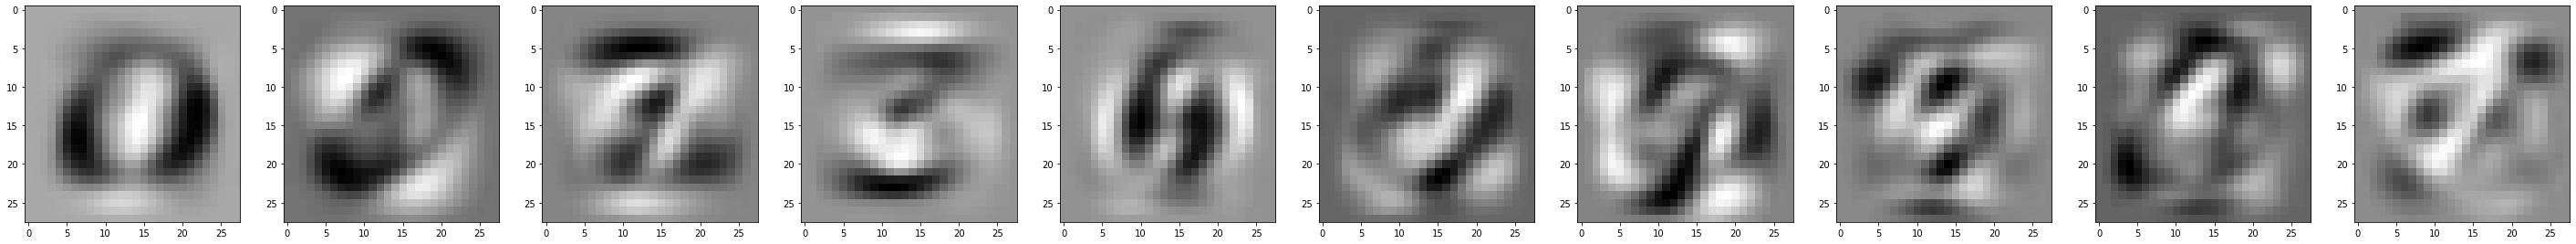

In [9]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,10,figsize=(50,50))
for i in range(10):
    ax[i].imshow(eigenValVec[i][1].reshape(28,28),cmap=cm.gray)
plt.show()